In [3227]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd
import random
from scipy.spatial import KDTree
import warnings
from scipy.spatial import KDTree
import time
warnings.filterwarnings('ignore')

# 1. K-Mean++

In [3049]:
as31 = pd.read_csv('as3_1.txt', sep = '\t', header = None)

In [3050]:
as31

,0,1,2
0,25.0514,5.7475,1
1,26.6614,7.3414,1
2,25.2653,6.2466,1
3,25.2285,4.7447,1
4,25.7529,5.1564,1
...,...,...,...
3095,5.1380,16.6150,31
3096,5.7360,16.9991,31
3097,5.2760,17.2475,31
3098,6.4444,16.2033,31


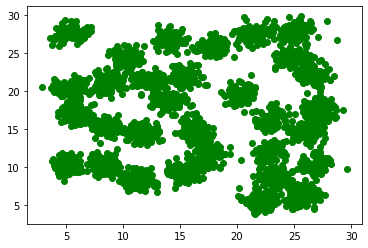

In [3051]:
plt.scatter(as31[0], as31[1], color = 'g')

In [3052]:
k_num = len(as31[2].value_counts())
k_num

31

In [3053]:
def calculate_disatnce(point1, point2):
    return ((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)**(1/2)

In [3065]:
def myInit(x, y, k):
    n = len(x)
    first = np.random.randint(n)
    first_cent = (x[first], y[first])
    cent = []
    cent.append(first_cent)
    for k in range(k-1):
        distant = []
        for i in range(len(x)):
            point_centroid = []
            for j in cent:
                point_centroid.append(calculate_disatnce((x[i], y[i]), j))
            point_centroid = np.array(point_centroid)
            if k ==0:
                possile_pick = point_centroid.max()
            else:
                possile_pick = point_centroid.min()/point_centroid.sum()
            distant.append(possile_pick)
        distant = np.array(distant)
        
        maxpossile = np.argmax(distant)    
        while (x[maxpossile], y[maxpossile]) in cent:
            distant[maxpossile]=-1
            maxpossile = np.argmax(distant)
        cent.append((x[maxpossile], y[maxpossile]))
    return cent

In [3066]:
cen = myInit(as31[0], as31[1], 31)

In [3071]:
cen = np.array(cen)
cen_x = cen[:,0]
cen_y = cen[:,1]

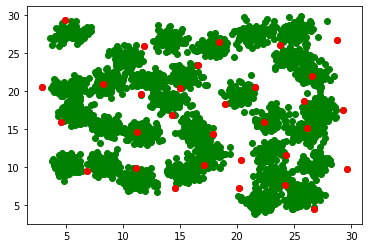

In [3072]:
plt.scatter(as31[0], as31[1], color = 'g')
plt.scatter(cen_x, cen_y, color = 'r')

In [3073]:
def myUpdateCentroid(center):
    return center

In [3074]:
def myCentroid(x, y, group):
    centerr = []
    for grou in group:
        xx = 0
        yx = 0
        for i in grou:
            n = len(i)
            for j in i:
                xx += x[j]
                yx += y[j]  
        centerr.append((xx/n, yx/n))
    return centerr

In [3075]:
def myAssign(x, y, center, group):
    lebel = [-1 for i in range(len(x))]
    center_label = {}
    for i in range(len(x)):
        point_center = []
        isself = False
        for k in center:
            if calculate_disatnce((x[i], y[i]), k)==0:
                isself = True
            point_center.append(calculate_disatnce((x[i], y[i]), k))
        if isself==True:
            continue
        point_center = np.array(point_center)
        nearest = np.argmin(point_center)
        if center[nearest] in center_label.keys():
            lebel[i] = center_label[center[nearest]]
        else:
            lebel[i] = (len(center_label.keys())+1)
            index = -1
            for p in range(len(x)):
                if x[p]== center[nearest][0] and y[p]== center[nearest][1]:
                    index = p
            if index != -1:
                lebel[index] = (len(center_label.keys())+1)
            center_label[center[nearest]] = (len(center_label.keys())+1)
    return(lebel)

In [3076]:
def myKmeanPlusPlus(k, myTol, myMax):
    center = myInit(as31[0], as31[1], k)
    group = [-1]
    label0 = [-1 for i in range(len(data))]
    label = myAssign(as31[0], as31[1], center, group)
    iterations = 0
    group1 = []
    for i in np.unique(label):
        group1.append(np.where(label==i))
    center = myCentroid(as31[0], as31[1], group1)
    center = myUpdateCentroid(center)
    group = np.array(group)
    group1 = group1
    comparison = (group == group1)
    tol = np.Inf
    while (iterations>myMax or np.array_equal(group, group1) or tol<myTol) == False:
        label0 = label
        label = myAssign(as31[0], as31[1], center, group1)
        group = group1
        group1 = []
        for i in np.unique(label):
            group1.append(np.where(label==i))
        center = myCentroid(as31[0], as31[1], group1)
        center = myUpdateCentroid(center)
        iterations+=1
        group = group
        group1 = group1
        label0_np = np.array(label0)
        label_np = np.array(label)
        tol = len(label0_np[label0_np!=label_np])
        print(f'{tol} points are different from the last iteration')
    print(f'-----{iterations} times iteration-----')
    return group1

In [3077]:
def myPlot(clustering):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(clustering))]
    for i in range(len(clustering)):
        for j in clustering[i]:
            plt.scatter(as31[0][j], as31[1][j], c = color[i])

1942 points are different from the last iteration
1556 points are different from the last iteration
2176 points are different from the last iteration
1195 points are different from the last iteration
2376 points are different from the last iteration
20 points are different from the last iteration
2074 points are different from the last iteration
17 points are different from the last iteration
9 points are different from the last iteration
86 points are different from the last iteration
3 points are different from the last iteration
0 points are different from the last iteration
-----12 times iteration-----


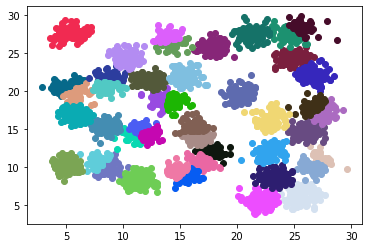

In [3078]:
clustering = myKmeanPlusPlus(44, 2, 100)
myPlot(clustering)

2454 points are different from the last iteration
1650 points are different from the last iteration
869 points are different from the last iteration
2137 points are different from the last iteration
10 points are different from the last iteration
7 points are different from the last iteration
2 points are different from the last iteration
2 points are different from the last iteration
2 points are different from the last iteration
2 points are different from the last iteration
2 points are different from the last iteration
1 points are different from the last iteration
-----12 times iteration-----


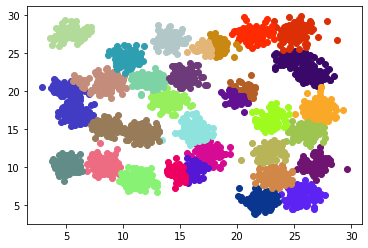

In [3079]:
clustering = myKmeanPlusPlus(31, 2, 100)
myPlot(clustering)

978 points are different from the last iteration
1917 points are different from the last iteration
284 points are different from the last iteration
69 points are different from the last iteration
259 points are different from the last iteration
393 points are different from the last iteration
34 points are different from the last iteration
312 points are different from the last iteration
404 points are different from the last iteration
20 points are different from the last iteration
18 points are different from the last iteration
18 points are different from the last iteration
22 points are different from the last iteration
25 points are different from the last iteration
27 points are different from the last iteration
19 points are different from the last iteration
14 points are different from the last iteration
14 points are different from the last iteration
10 points are different from the last iteration
923 points are different from the last iteration
2 points are different from the

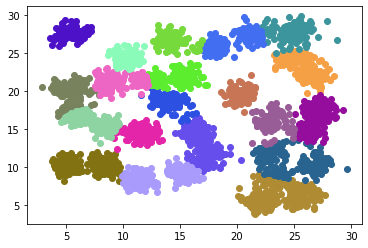

In [3080]:
clustering = myKmeanPlusPlus(20, 2, 100)
myPlot(clustering)

237 points are different from the last iteration
322 points are different from the last iteration
374 points are different from the last iteration
231 points are different from the last iteration
69 points are different from the last iteration
30 points are different from the last iteration
20 points are different from the last iteration
21 points are different from the last iteration
28 points are different from the last iteration
43 points are different from the last iteration
60 points are different from the last iteration
80 points are different from the last iteration
111 points are different from the last iteration
89 points are different from the last iteration
77 points are different from the last iteration
46 points are different from the last iteration
43 points are different from the last iteration
41 points are different from the last iteration
52 points are different from the last iteration
43 points are different from the last iteration
42 points are different from the la

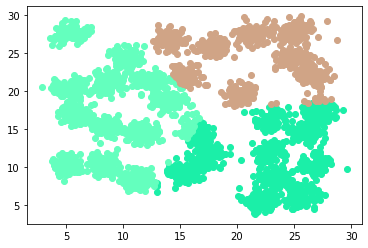

In [3081]:
clustering = myKmeanPlusPlus(3, 2, 100)
myPlot(clustering)

# 2 DBSCAN

In [3255]:
as3_2 = np.genfromtxt('as3_2.csv', delimiter=',')

In [3256]:
as3_2

array([[27.7 , 20.85,  1.  ],
       [29.9 , 19.95,  1.  ],
       [26.8 , 19.05,  1.  ],
       ...,
       [15.6 ,  9.45,  6.  ],
       [15.3 ,  9.15,  6.  ],
       [15.1 ,  9.55,  6.  ]])

In [3378]:
def getLabel(data):
    '''
    This function require input a two dimension array.
    ---------------------------------------------------
    This function will extract the label from data set and return a label list
    '''
    return data[:,2]

In [3379]:
def getDate(data):
    '''
    This function require input a two dimension array.
    ---------------------------------------------------
    This function will extract the label from data set and return x and y list
    '''
    x = []
    y = []
    for i in data:
        x.append(i[0])
        y.append(i[1])
    return x,y

In [3555]:
label = getLabel(as3_2)
x, y = getDate(as3_2)

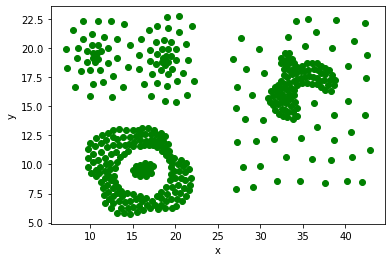

In [3381]:
plt.figure()
plt.scatter(x,y,marker='o', c='g')
plt.xlabel("x")
plt.ylabel("y")
plt.show();

In [3382]:
lists = [i for i in range(len(x))]
listss = []
for i in range(len(lists)):
    listss.append(lists)

In [3383]:
class Queue(object):
    def __init__(self):
        self._deque = deque()
    def push(self, value):
        return self._deque.append(value)
    def pop(self):
        return self._deque.popleft()
    def __len__(self):
        return len(self._deque)

In [3384]:
def BFS(graph, start):
    queue = Queue()
    queue.push(start)
    search = set()
    while queue:
        node = queue.pop()
        if node not in search:
            search.add(node)
            if node in graph.keys():
                for nodes in graph[node]:
                    queue.push(nodes)
    return search

In [3385]:
def getDBSCAN(x, y, epsilon, minPoints):
    core = dict()
    noise = []
    cluster = []
    for i in range(len(x)):
        x_tempt = []
        for j in range(len(x)):
            if i!=j:
                if (((y[j]-y[i])**2+(x[j]-x[i])**2)**(1/2)) < epsilon:
                    x_tempt.append(j)
        if len(x_tempt)<minPoints:
            noise.append(i)
        else:
            core[i] = x_tempt
    index = [iiii for iiii in range(len(x))]
    cluster_temp = []
    
    noise = set(noise)
    index = set(index)
    index_incore = set()
    index_incore.update(core.keys())  
    index_incore = list(index_incore)
    for ii in index_incore:
        asin = True
        for jj in cluster:
            for kk in jj:
                if ii == kk:
                    asin = False
        if asin == True:
            clust = []
            set_cluster = BFS(core, ii)
            isexist = False
            set_cluster = list(set_cluster)
            for jjj in cluster:
                for kkk in jjj:
                    if set_cluster[0]== kkk[0]:
                        isexist = True
            if isexist==False:
                clust.append(set_cluster)
                cluster.append(clust)
    return cluster

In [3386]:
def get_predictLebale(x, cluster):
    label = [-1 for i in range(len(x))]
    cluster_label = [-1 for i in range(len(cluster))]
    cluster_label_count = 0
    for i in range(len(x)):
        for j in range(len(cluster)):
            if i in cluster[j][0]:
                if cluster_label[j]==-1:
                    cluster_label_count += 1
                    label[i] = cluster_label_count
                    cluster_label[j] = cluster_label_count
                else:
                    label[i] = cluster_label[j]
    label = np.array(label)+1
    return label

In [3387]:
as3_2

array([[27.7 , 20.85,  1.  ],
       [29.9 , 19.95,  1.  ],
       [26.8 , 19.05,  1.  ],
       ...,
       [15.6 ,  9.45,  6.  ],
       [15.3 ,  9.15,  6.  ],
       [15.1 ,  9.55,  6.  ]])

In [3388]:
def getAccuracy(data, label):
    true_label = getLabel(data)
    accuracy = len(label[true_label==label])/len(label)
    print(f'accuracy = {accuracy}')
    return accuracy

In [3389]:
def plotDBSCAN(x, y, label):
    label = np.array(label)
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(np.unique(label)))]
    label_unique = np.unique(label)
    for i in range(len(label)):
        index = -1
        for j in range(len(label_unique)):
            if label[i] == label_unique[j]:
                index = j
        plt.scatter(x[i], y[i], c = color[index])

In [3390]:
#1.5 13
cluster = getDBSCAN(x, y, 1.5, 13)

In [3391]:
label2 = get_predictLebale(x, cluster)

In [3392]:
accuracy = getAccuracy(as3_2, label2)

accuracy = 0.76010101010101


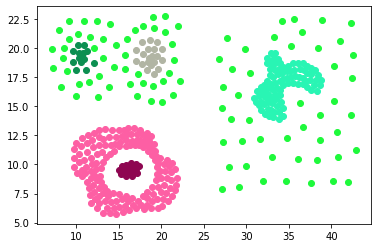

In [3393]:
plotDBSCAN(x, y, label2)

# 3 Improved DBSCAN

KDTree

In [3361]:
class visitlist:
    def _init_(self, count=0):
        self.unvisitedlist=[i for i in range(count)]
        self.visitedlist=list()
        self.unvisitednum=count
    def visit(self, pointId):
        self.visitedlist.append(pointId)
        self.unvisitedlist.remove(pointId)
        self.unvisitednum -= 1    

In [3362]:
def kdtree_DBSCAN(dataSet, eps, minPts):
    num = dataSet.shape[0]
    k = -1
    label = [-1 for i in range(num)]
    kd = KDTree(dataSet)
    point = visitlist()
    point._init_(num)
    while point.unvisitednum>0:
        p = random.choice(point.unvisitedlist)
        point.visit(p)
        N = kd.query_ball_point(dataSet[p], eps)
        if len(N) >= minPts:
            k += 1
            label[p] = k
            for p1 in N:
                if p1 in point.unvisitedlist:
                    point.visit(p1)
                    M = kd.query_ball_point(dataSet[p1], eps)
                    if len(M) >= minPts:
                        for i in M:
                            if i not in N:
                                N.append(i)
                    if label[p1] == -1:
                        label[p1] = k
            else:
                label[p1] = -1
    return label

In [3553]:
label = kdtree_DBSCAN(data, 1.5, 13)

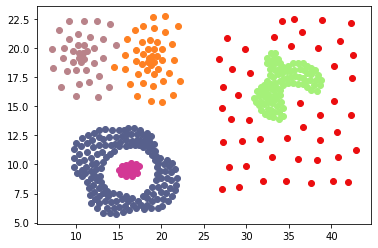

In [3556]:
plotDBSCAN(x, y, label)

In [3365]:
start1 = time.time()
label1 = kdtree_DBSCAN(data, 1.5, 13)
end1 = time.time()
print(f'KDtree need time {end1-start1}')

KDtree need time 0.007496356964111328


In [3366]:
start2 = time.time()
label3 = get_predictLebale(x, cluster)
end2 = time.time()
print(f'DBSCAN need time {end2-start2}')

DBSCAN need time 0.007121086120605469


In [3367]:
label1 = np.array(label1)
label1 = label1+1


-----------------The following steps can't be repeated.

In [3368]:
label1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [3370]:
label1[label1==2]=6
label1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [3371]:
label1[label1==1]=2
label1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [3372]:
label1[label1==5]=45
label1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  0,  0,  0,  0,  0,  0,  0, 45, 45,  0,  0, 45, 45,  0,
        0,  0, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,  0,  0,
       45, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        4,  4,  0,  0,  0,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  0,  0,  4,  4,  0,  0,  0,  4,  0,  0,
        0,  3,  3,  3,  3

In [3373]:
label1[label1==3]=5
label1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  0,  0,  0,  0,  0,  0,  0, 45, 45,  0,  0, 45, 45,  0,
        0,  0, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45,  0,  0,
       45, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        4,  4,  0,  0,  0,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  0,  0,  4,  4,  0,  0,  0,  4,  0,  0,
        0,  5,  5,  5,  5

In [3374]:
label1[label1==45]=3
label1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [3369]:
label3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [3394]:
true_label = (getLabel(as3_2))

In [3396]:
print(f'accuracy of kdtree is {len(label1[label1==true_label])/len(true_label)}')

accuracy of kdtree is 0.7727272727272727


In [3397]:
print(f'accuracy of myDBSCAN is {len(label1[label3==true_label])/len(true_label)}')

accuracy of myDBSCAN is 0.76010101010101


So the accuracy improved.

In [3604]:
new_data = pd.read_csv('https://raw.githubusercontent.com/wenbo/MLBook/master/chapter04/testdata/4k2_far.txt', sep='\t', header=None)

In [3605]:
new_data

,0,1,2
0,1,2.7266,3.0102
1,1,3.1304,2.4673
2,1,3.0492,2.5250
3,1,3.2260,3.1649
4,1,2.7223,2.5713
...,...,...,...
395,4,7.6063,5.0272
396,4,7.2716,5.0681
397,4,6.7997,5.3631
398,4,6.8852,5.1578


In [3606]:
train_data = new_data.iloc[:, 1:3]

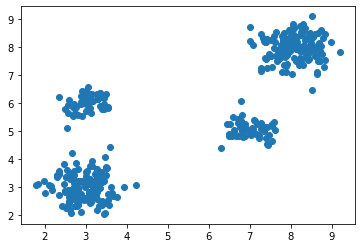

In [3607]:
plt.scatter(train_data.iloc[:,0], train_data.iloc[:,1])

In [3613]:
start1 = time.time()
label11 = np.array(kdtree_DBSCAN(data, 7, 88))
end1 = time.time()
print(f'KDtree need time {end1-start1}')

KDtree need time 0.07535099983215332


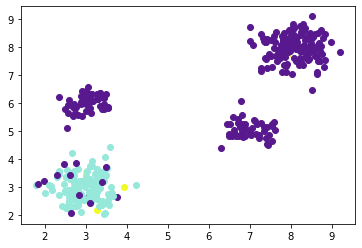

In [3614]:
plotDBSCAN(train_data.iloc[:,0], train_data.iloc[:,1], label11)

In [3621]:
cluster = getDBSCAN(x, y, 7, 88)
start2 = time.time()
label31 = get_predictLebale(data, cluster)
end2 = time.time()
print(f'DBSCAN need time {end2-start2}')

DBSCAN need time 0.0011467933654785156


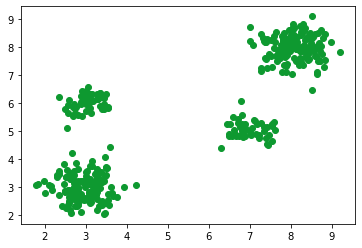

In [3622]:
plotDBSCAN(train_data.iloc[:,0], train_data.iloc[:,1], label31)

I use a data set to test. Whatever it is convergence or not, in this data set, my method is quicker.